In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import math

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [7]:
cpu_data = pd.read_csv("cpuProductData.csv")
gpu_data = pd.read_csv("gpuProductData.csv")
gpuModels = pd.read_csv("gpuModels.csv")
cpuModels = pd.read_csv("cpuModels.csv")


In [ ]:
models = gpuModels.append(cpuModels)
models = models.drop(columns = ['id'])
label_encoder = LabelEncoder()
models['model_code'] = label_encoder.fit_transform(models['model'])
enc_models= pd.get_dummies(models.model_code, prefix='m')
models = pd.concat([models, enc_models], axis=1)
models.tail()

In [8]:
label_encoder = LabelEncoder()
brands['brand_code'] = label_encoder.fit_transform(brands['brand'])
enc_brands = pd.get_dummies(brands.brand_code, prefix='b')
brands = pd.concat([brands, enc_brands], axis=1)
brands.tail()

In [9]:
availability = pd.DataFrame(["Out of stock", "In stock"])
availability = availability.rename(columns={0: "availability"})
availability['availability_code'] = label_encoder.fit_transform(availability['availability'])
enc_availability = pd.get_dummies(availability.availability_code, prefix='a')
availability = pd.concat([availability, enc_availability], axis=1)
availability.tail()


In [ ]:
type_ = pd.DataFrame(["cpu", "gpu"])
type_ = type_.rename(columns={0: "type"})
type_['type_code'] = label_encoder.fit_transform(type_['type'])
enc_type = pd.get_dummies(type_.type_code, prefix='t')
type_ = pd.concat([type_, enc_type], axis=1)
type_.tail()

In [10]:
cpu_data['model'] = cpu_data['model'].str.upper()
cpuModels['model'] = cpuModels['model'].str.upper()
cleanData(cpu_data, cpuModels)
cpu_data

,brand,model,price,availability,date,type,modelID
0,Intel,CORE I9 7980XE,32999,1,20171231072512,cpu,109.0
1,Intel,CORE I9 7960X,27999,1,20171231072512,cpu,110.0
2,Intel,CORE I9 7940X,22999,1,20171231072512,cpu,111.0
3,AMD,RYZEN THREADRIPPER 1950X,18299,1,20171231072512,cpu,29.0
4,Intel,CORE I9 7900X,16199,1,20171231072512,cpu,112.0
...,...,...,...,...,...,...,...
2777,AMD,RYZEN 3 3300X,3299,0,20210702153249,cpu,15.0
2778,AMD,RYZEN 3 3100,2179,0,20210702153249,cpu,18.0
2779,Intel,CORE I3 9100,1849,0,20210702153249,cpu,174.0
2780,AMD,ATHLON 3000G DUAL CORE,1499,0,20210702153249,cpu,37.0


In [11]:
cpu_data[cpu_data['modelID'].isnull() == True]

,brand,model,price,availability,date,type,modelID


In [12]:
gpu_data['model'] = gpu_data['model'].str.upper()
gpuModels['model'] = gpuModels['model'].str.upper()
cleanData(gpu_data, gpuModels)
gpu_data

,brand,model,price,availability,date,type,modelID
0,Asus Rog Poseidon Platinum,GTX 1080 TI 11GB,16799,1,20171231072514,gpu,28.0
1,Asus Rog Strix,GEFORCE GTX 1080 TI 11GB,14129,1,20171231072514,gpu,28.0
2,MSI,GEFORCE GTX 1080 TI GAMING X TRIO,13999,1,20171231072514,gpu,28.0
3,MSI,RADEON RX VEGA 64 8GB,13799,0,20171231072514,gpu,18.0
4,MSI,GEFORCE GTX 1080 TI GAMING X OC,13799,0,20171231072514,gpu,28.0
...,...,...,...,...,...,...,...
4586,Palit,GEFORCE RTX 2060 SUPER DUAL 8GB,12999,1,20210702153259,gpu,31.0
4587,MSI,GEFORCE GT 1030 AERO 2GB OC,2099,1,20210702153259,gpu,20.0
4588,MSI,GEFORCE GT 1030 LP 2GB OC,2099,1,20210702153259,gpu,20.0
4589,MSI,GEFORCE GT 730 LP 2GB,1599,1,20210702153259,gpu,30.0


In [13]:
gpu_data[gpu_data['modelID'].isnull() == True]

,brand,model,price,availability,date,type,modelID


In [14]:
data = gpu_data.append(cpu_data, ignore_index = True)
data['model'] = data['model'].str.upper()
data['date'] = data['date'].astype(str).str.extract(r'^(\d{8})', expand=False)
data['date'] = data['date'].astype(int)
data

,brand,model,price,availability,date,type,modelID
0,Asus Rog Poseidon Platinum,GTX 1080 TI 11GB,16799,1,20171231,gpu,28.0
1,Asus Rog Strix,GEFORCE GTX 1080 TI 11GB,14129,1,20171231,gpu,28.0
2,MSI,GEFORCE GTX 1080 TI GAMING X TRIO,13999,1,20171231,gpu,28.0
3,MSI,RADEON RX VEGA 64 8GB,13799,0,20171231,gpu,18.0
4,MSI,GEFORCE GTX 1080 TI GAMING X OC,13799,0,20171231,gpu,28.0
...,...,...,...,...,...,...,...
7368,AMD,RYZEN 3 3300X,3299,0,20210702,cpu,15.0
7369,AMD,RYZEN 3 3100,2179,0,20210702,cpu,18.0
7370,Intel,CORE I3 9100,1849,0,20210702,cpu,174.0
7371,AMD,ATHLON 3000G DUAL CORE,1499,0,20210702,cpu,37.0


In [15]:
def cleanData(data, models):
    data['availability'] = [1 if x == 'In Stock' else 0 for x in data['availability']]
    
    for dt in data.itertuples():
        for model in models.itertuples():
            if dt.model.find(str(model.model)) != -1:
                data.at[dt.Index,'modelID'] = model.Index
                continue

    data.head()

In [16]:
data['type'] = [1 if x == 'gpu' else 0 for x in data['type']]

In [17]:
data

,brand,model,price,availability,date,type,modelID
0,Asus Rog Poseidon Platinum,GTX 1080 TI 11GB,16799,1,20171231,1,28.0
1,Asus Rog Strix,GEFORCE GTX 1080 TI 11GB,14129,1,20171231,1,28.0
2,MSI,GEFORCE GTX 1080 TI GAMING X TRIO,13999,1,20171231,1,28.0
3,MSI,RADEON RX VEGA 64 8GB,13799,0,20171231,1,18.0
4,MSI,GEFORCE GTX 1080 TI GAMING X OC,13799,0,20171231,1,28.0
...,...,...,...,...,...,...,...
7368,AMD,RYZEN 3 3300X,3299,0,20210702,0,15.0
7369,AMD,RYZEN 3 3100,2179,0,20210702,0,18.0
7370,Intel,CORE I3 9100,1849,0,20210702,0,174.0
7371,AMD,ATHLON 3000G DUAL CORE,1499,0,20210702,0,37.0


In [18]:
    brands = set(data["brand"].str.upper())
    brands = brands
    brands = pd.DataFrame(brands)
    brands = brands.rename(columns={0: "brand"})
    brands

    for brand in brands.itertuples():
        data.loc[data["brand"].str.upper() == brand.brand, "brand"] = brand.Index

In [19]:
data

,brand,model,price,availability,date,type,modelID
0,27,GTX 1080 TI 11GB,16799,1,20171231,1,28.0
1,8,GEFORCE GTX 1080 TI 11GB,14129,1,20171231,1,28.0
2,22,GEFORCE GTX 1080 TI GAMING X TRIO,13999,1,20171231,1,28.0
3,22,RADEON RX VEGA 64 8GB,13799,0,20171231,1,18.0
4,22,GEFORCE GTX 1080 TI GAMING X OC,13799,0,20171231,1,28.0
...,...,...,...,...,...,...,...
7368,21,RYZEN 3 3300X,3299,0,20210702,0,15.0
7369,21,RYZEN 3 3100,2179,0,20210702,0,18.0
7370,4,CORE I3 9100,1849,0,20210702,0,174.0
7371,21,ATHLON 3000G DUAL CORE,1499,0,20210702,0,37.0


In [20]:
# data[data["modelID"] == 4]

In [21]:
# data.loc[data["type"] == 0, ['modelID']] += 44
data[data["type"] == 0]

,brand,model,price,availability,date,type,modelID
4591,4,CORE I9 7980XE,32999,1,20171231,0,109.0
4592,4,CORE I9 7960X,27999,1,20171231,0,110.0
4593,4,CORE I9 7940X,22999,1,20171231,0,111.0
4594,21,RYZEN THREADRIPPER 1950X,18299,1,20171231,0,29.0
4595,4,CORE I9 7900X,16199,1,20171231,0,112.0
...,...,...,...,...,...,...,...
7368,21,RYZEN 3 3300X,3299,0,20210702,0,15.0
7369,21,RYZEN 3 3100,2179,0,20210702,0,18.0
7370,4,CORE I3 9100,1849,0,20210702,0,174.0
7371,21,ATHLON 3000G DUAL CORE,1499,0,20210702,0,37.0


In [22]:
data

,brand,model,price,availability,date,type,modelID
0,27,GTX 1080 TI 11GB,16799,1,20171231,1,28.0
1,8,GEFORCE GTX 1080 TI 11GB,14129,1,20171231,1,28.0
2,22,GEFORCE GTX 1080 TI GAMING X TRIO,13999,1,20171231,1,28.0
3,22,RADEON RX VEGA 64 8GB,13799,0,20171231,1,18.0
4,22,GEFORCE GTX 1080 TI GAMING X OC,13799,0,20171231,1,28.0
...,...,...,...,...,...,...,...
7368,21,RYZEN 3 3300X,3299,0,20210702,0,15.0
7369,21,RYZEN 3 3100,2179,0,20210702,0,18.0
7370,4,CORE I3 9100,1849,0,20210702,0,174.0
7371,21,ATHLON 3000G DUAL CORE,1499,0,20210702,0,37.0


In [23]:
model_one_hot_encoding = pd.get_dummies(data["modelID"], prefix="model", prefix_sep='.')
data_2 = data
data_2 = pd.concat([data, model_one_hot_encoding], axis=1)
data_2

,brand,model,price,availability,date,type,modelID,model.0.0,model.1.0,model.2.0,...,model.167.0,model.168.0,model.169.0,model.170.0,model.172.0,model.173.0,model.174.0,model.175.0,model.176.0,model.177.0
0,27,GTX 1080 TI 11GB,16799,1,20171231,1,28.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,GEFORCE GTX 1080 TI 11GB,14129,1,20171231,1,28.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,GEFORCE GTX 1080 TI GAMING X TRIO,13999,1,20171231,1,28.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,RADEON RX VEGA 64 8GB,13799,0,20171231,1,18.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,GEFORCE GTX 1080 TI GAMING X OC,13799,0,20171231,1,28.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,21,RYZEN 3 3300X,3299,0,20210702,0,15.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7369,21,RYZEN 3 3100,2179,0,20210702,0,18.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7370,4,CORE I3 9100,1849,0,20210702,0,174.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7371,21,ATHLON 3000G DUAL CORE,1499,0,20210702,0,37.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
model_one_hot_encoding = pd.get_dummies(data["brand"], prefix="brand", prefix_sep='.')
data_2 = pd.concat([data_2, model_one_hot_encoding], axis=1)
data_2

,brand,model,price,availability,date,type,modelID,model.0.0,model.1.0,model.2.0,...,brand.20,brand.21,brand.22,brand.23,brand.24,brand.25,brand.26,brand.27,brand.28,brand.29
0,27,GTX 1080 TI 11GB,16799,1,20171231,1,28.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8,GEFORCE GTX 1080 TI 11GB,14129,1,20171231,1,28.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,GEFORCE GTX 1080 TI GAMING X TRIO,13999,1,20171231,1,28.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,22,RADEON RX VEGA 64 8GB,13799,0,20171231,1,18.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,22,GEFORCE GTX 1080 TI GAMING X OC,13799,0,20171231,1,28.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,21,RYZEN 3 3300X,3299,0,20210702,0,15.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7369,21,RYZEN 3 3100,2179,0,20210702,0,18.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7370,4,CORE I3 9100,1849,0,20210702,0,174.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7371,21,ATHLON 3000G DUAL CORE,1499,0,20210702,0,37.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
model_one_hot_encoding = pd.get_dummies(data["type"], prefix="type", prefix_sep='.')
data_2 = pd.concat([data_2, model_one_hot_encoding], axis=1)
data_2

,brand,model,price,availability,date,type,modelID,model.0.0,model.1.0,model.2.0,...,brand.22,brand.23,brand.24,brand.25,brand.26,brand.27,brand.28,brand.29,type.0,type.1
0,27,GTX 1080 TI 11GB,16799,1,20171231,1,28.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,8,GEFORCE GTX 1080 TI 11GB,14129,1,20171231,1,28.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,22,GEFORCE GTX 1080 TI GAMING X TRIO,13999,1,20171231,1,28.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,22,RADEON RX VEGA 64 8GB,13799,0,20171231,1,18.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,22,GEFORCE GTX 1080 TI GAMING X OC,13799,0,20171231,1,28.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,21,RYZEN 3 3300X,3299,0,20210702,0,15.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7369,21,RYZEN 3 3100,2179,0,20210702,0,18.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7370,4,CORE I3 9100,1849,0,20210702,0,174.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7371,21,ATHLON 3000G DUAL CORE,1499,0,20210702,0,37.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
model_one_hot_encoding = pd.get_dummies(data["availability"], prefix="availability", prefix_sep='.')
data_2 = pd.concat([data_2, model_one_hot_encoding], axis=1)
data_2

,brand,model,price,availability,date,type,modelID,model.0.0,model.1.0,model.2.0,...,brand.24,brand.25,brand.26,brand.27,brand.28,brand.29,type.0,type.1,availability.0,availability.1
0,27,GTX 1080 TI 11GB,16799,1,20171231,1,28.0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,8,GEFORCE GTX 1080 TI 11GB,14129,1,20171231,1,28.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,22,GEFORCE GTX 1080 TI GAMING X TRIO,13999,1,20171231,1,28.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,22,RADEON RX VEGA 64 8GB,13799,0,20171231,1,18.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,22,GEFORCE GTX 1080 TI GAMING X OC,13799,0,20171231,1,28.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,21,RYZEN 3 3300X,3299,0,20210702,0,15.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7369,21,RYZEN 3 3100,2179,0,20210702,0,18.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7370,4,CORE I3 9100,1849,0,20210702,0,174.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7371,21,ATHLON 3000G DUAL CORE,1499,0,20210702,0,37.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [27]:
data = data_2

In [28]:
data_a = data.drop(columns = ['brand', 'model','modelID', 'availability', 'type' ])
data_a

,price,date,model.0.0,model.1.0,model.2.0,model.3.0,model.4.0,model.5.0,model.6.0,model.7.0,...,brand.24,brand.25,brand.26,brand.27,brand.28,brand.29,type.0,type.1,availability.0,availability.1
0,16799,20171231,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,14129,20171231,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,13999,20171231,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,13799,20171231,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,13799,20171231,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,3299,20210702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7369,2179,20210702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7370,1849,20210702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7371,1499,20210702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [29]:
data = data_a

In [30]:
data

,price,date,model.0.0,model.1.0,model.2.0,model.3.0,model.4.0,model.5.0,model.6.0,model.7.0,...,brand.24,brand.25,brand.26,brand.27,brand.28,brand.29,type.0,type.1,availability.0,availability.1
0,16799,20171231,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,14129,20171231,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,13999,20171231,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,13799,20171231,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,13799,20171231,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,3299,20210702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7369,2179,20210702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7370,1849,20210702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7371,1499,20210702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [31]:
data['year'] = ''
data['month'] = ''
data['quarter']= ''
data['week']= ''
data['day_year']= ''
data['day_month']= ''
data['day_week']= ''

In [32]:
data

,price,date,model.0.0,model.1.0,model.2.0,model.3.0,model.4.0,model.5.0,model.6.0,model.7.0,...,type.1,availability.0,availability.1,year,month,quarter,week,day_year,day_month,day_week
0,16799,20171231,0,0,0,0,0,0,0,0,...,1,0,1,,,,,,,
1,14129,20171231,0,0,0,0,0,0,0,0,...,1,0,1,,,,,,,
2,13999,20171231,0,0,0,0,0,0,0,0,...,1,0,1,,,,,,,
3,13799,20171231,0,0,0,0,0,0,0,0,...,1,1,0,,,,,,,
4,13799,20171231,0,0,0,0,0,0,0,0,...,1,1,0,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,3299,20210702,0,0,0,0,0,0,0,0,...,0,1,0,,,,,,,
7369,2179,20210702,0,0,0,0,0,0,0,0,...,0,1,0,,,,,,,
7370,1849,20210702,0,0,0,0,0,0,0,0,...,0,1,0,,,,,,,
7371,1499,20210702,0,0,0,0,0,0,0,0,...,0,1,0,,,,,,,


In [33]:
data.date

0       20171231
1       20171231
2       20171231
3       20171231
4       20171231
          ...   
7368    20210702
7369    20210702
7370    20210702
7371    20210702
7372    20210702
Name: date, Length: 7373, dtype: int32

In [34]:
def split_date(date):
    year = int(date[:4])
    month = int(date[4:6])
    day_month = int(date[6:8])
    week = datetime.date(year, month, day_month).isocalendar()[1]
    day_week = datetime.date(year, month, day_month).isocalendar()[2]
    day_year = day_week * week
    quarter = math.ceil(float(month)/3)
    return year, month, quarter, week, day_year, day_month, day_week

In [35]:
# year, month, quarter, week, day_year, day_month, day_week = split_date(str(data.date))

In [36]:
for dt in data.itertuples():
    year, month, quarter, week, day_year, day_month, day_week = split_date(str(dt.date))
    data.at[dt.Index, 'year'] = year
    data.at[dt.Index, 'month'] = month
    data.at[dt.Index, 'quarter'] = quarter
    data.at[dt.Index, 'week'] = week
    data.at[dt.Index, 'day_year'] = day_year
    data.at[dt.Index, 'day_month'] = day_month
    data.at[dt.Index, 'day_week'] = day_week

In [37]:
data = data.drop(columns = ['date'])
data

,price,model.0.0,model.1.0,model.2.0,model.3.0,model.4.0,model.5.0,model.6.0,model.7.0,model.10.0,...,type.1,availability.0,availability.1,year,month,quarter,week,day_year,day_month,day_week
0,16799,0,0,0,0,0,0,0,0,0,...,1,0,1,2017,12,4,52,364,31,7
1,14129,0,0,0,0,0,0,0,0,0,...,1,0,1,2017,12,4,52,364,31,7
2,13999,0,0,0,0,0,0,0,0,0,...,1,0,1,2017,12,4,52,364,31,7
3,13799,0,0,0,0,0,0,0,0,0,...,1,1,0,2017,12,4,52,364,31,7
4,13799,0,0,0,0,0,0,0,0,0,...,1,1,0,2017,12,4,52,364,31,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,3299,0,0,0,0,0,0,0,0,0,...,0,1,0,2021,7,3,26,130,2,5
7369,2179,0,0,0,0,0,0,0,0,0,...,0,1,0,2021,7,3,26,130,2,5
7370,1849,0,0,0,0,0,0,0,0,0,...,0,1,0,2021,7,3,26,130,2,5
7371,1499,0,0,0,0,0,0,0,0,0,...,0,1,0,2021,7,3,26,130,2,5


In [38]:
train_dataset = data.sample(frac=0.8, random_state=5)
test_dataset = data.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [39]:
train_dataset.head()

,price,model.0.0,model.1.0,model.2.0,model.3.0,model.4.0,model.5.0,model.6.0,model.7.0,model.10.0,...,type.1,availability.0,availability.1,year,month,quarter,week,day_year,day_month,day_week
857,7999,0,0,0,0,0,0,0,0,0,...,1,0,1,2018,7,3,27,54,3,2
1302,25499,0,1,0,0,0,0,0,0,0,...,1,1,0,2018,9,3,37,222,15,6
2706,16499,0,1,0,0,0,0,0,0,0,...,1,1,0,2019,4,2,14,70,5,5
4666,12499,0,0,0,0,0,0,0,0,0,...,0,1,0,2018,2,1,6,24,8,4
649,11999,0,0,0,0,0,0,0,0,0,...,1,0,1,2018,5,2,22,88,31,4


In [40]:
train_labels.head()

857      7999
1302    25499
2706    16499
4666    12499
649     11999
Name: price, dtype: int64

In [41]:
input_data = np.array(train_features)
output_label = np.array(train_labels)

test_data = np.array(test_features)
test_output = np.array(test_labels)

print(output_label.shape)
print(test_output.shape)

(5898,)
(1475,)


In [42]:
output_label.shape

(5898,)

In [43]:
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

y_train=np.reshape(train_labels, (-1,1))
y_val=np.reshape(test_labels, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(input_data))
xtrain_scale=scaler_x.transform(input_data)

print(scaler_x.fit(test_data))
xval_scale=scaler_x.transform(test_data)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [56]:
model = keras.Sequential([
      layers.Dense(len(xtrain_scale[0]) + 1, input_dim=len(xtrain_scale[0]), kernel_initializer='normal', activation='relu'),
      layers.Dense(399, activation='relu'),
      layers.Dense(399, activation='relu'),
      layers.Dense(1,  activation='relu')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 158)               24964     
_________________________________________________________________
dense_5 (Dense)              (None, 399)               63441     
_________________________________________________________________
dense_6 (Dense)              (None, 399)               159600    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 400       
Total params: 248,405
Trainable params: 248,405
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=1000, batch_size=150, verbose=0, validation_split=0.2)

In [58]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
995,0.000070,0.000070,0.003878,0.000377,0.000377,0.008972,995
996,0.000069,0.000069,0.003736,0.000364,0.000364,0.008806,996
997,0.000070,0.000070,0.003759,0.000385,0.000385,0.008934,997
998,0.000071,0.000071,0.003774,0.000351,0.000351,0.008649,998
999,0.000069,0.000069,0.003583,0.000374,0.000374,0.008772,999


## Prediction on the testset

In [59]:
predictions = model.predict(xval_scale)
predictions = scaler_y.inverse_transform(predictions)
print(predictions)

[[ 7009.0703]
 [ 3625.0474]
 [ 4912.351 ]
 ...
 [46106.31  ]
 [ 9805.915 ]
 [ 1695.1748]]


In [60]:
metrics = model.evaluate(xval_scale, yval_scale)

47/47 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0275  


In [61]:
metrics

[0.0019807666540145874, 0.0019807666540145874, 0.027475008741021156]

# Error loss

In [62]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [PRICE]')
  plt.legend()
  plt.grid(True)

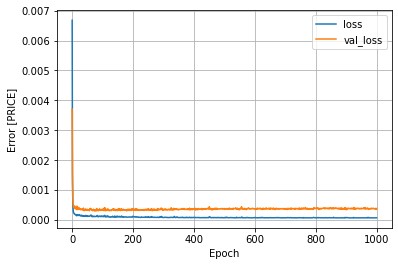

In [63]:
plot_loss(history)

In [64]:
test = xval_scale[50].reshape(1,157)
label = yval_scale[50].reshape(-1,1)

test_predictions = model.predict(test)
test_predictions = scaler_y.inverse_transform(test_predictions)
print("Prediction",test_predictions)

Prediction [[8548.275]]


# Scatterplot show casting the model perfomance on the testSet

[]

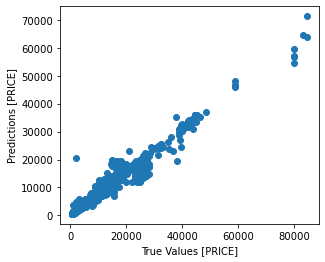

In [65]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, predictions)
plt.xlabel('True Values [PRICE]')
plt.ylabel('Predictions [PRICE]')
plt.plot()

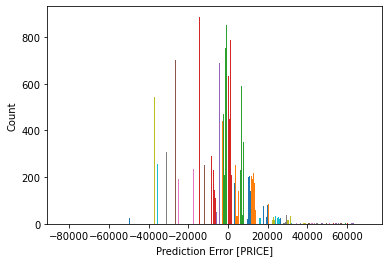

In [66]:
error = predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [PRICE]')
_ = plt.ylabel('Count')

In [67]:
model.save('price_prediction.h5')